In [23]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("CassandraSparkRemote") \
    .config("spark.cassandra.connection.host", "172.17.0.1") \
    .getOrCreate()

df = spark.read \
    .format("org.apache.spark.sql.cassandra") \
    .options(table="estudiantes", keyspace="bbdd2") \
    .load()

df.show(10)


+------+--------------------+----+--------------------+
|    id|             carrera|edad|              nombre|
+------+--------------------+----+--------------------+
|204621|Diseño de Moda In...|  19|    Dimas Bonet Gual|
|104131|     Biología Marina|  22|     Alfredo Stucchi|
|151775|     Teoría Práctica|  30|Marissa Serlupi-C...|
| 71772|Diseño de Moda In...|  24| Baudelio Elías Roma|
| 11317|      Artes del Café|  24|     Priscilla Dossi|
|110672|  Filosofía Cuántica|  26|         Jerome Todd|
|210757|   Psicología Canina|  22|         Brian Davis|
|197627|     Teoría Práctica|  20|        Sherry Olsen|
|150645| Música para Plantas|  20|        Marie Brooks|
|175449| Música para Plantas|  18|Lilia Botella Jordán|
+------+--------------------+----+--------------------+
only showing top 10 rows



In [24]:
df.show(10)


+------+--------------------+----+--------------------+
|    id|             carrera|edad|              nombre|
+------+--------------------+----+--------------------+
|204621|Diseño de Moda In...|  19|    Dimas Bonet Gual|
|104131|     Biología Marina|  22|     Alfredo Stucchi|
|151775|     Teoría Práctica|  30|Marissa Serlupi-C...|
| 71772|Diseño de Moda In...|  24| Baudelio Elías Roma|
| 11317|      Artes del Café|  24|     Priscilla Dossi|
|110672|  Filosofía Cuántica|  26|         Jerome Todd|
|210757|   Psicología Canina|  22|         Brian Davis|
|197627|     Teoría Práctica|  20|        Sherry Olsen|
|150645| Música para Plantas|  20|        Marie Brooks|
|175449| Música para Plantas|  18|Lilia Botella Jordán|
+------+--------------------+----+--------------------+
only showing top 10 rows



In [10]:
df.filter(df.edad > 25).select("nombre", "edad", "carrera").show()

+--------------------+----+--------------------+
|              nombre|edad|             carrera|
+--------------------+----+--------------------+
|Marissa Serlupi-C...|  30|     Teoría Práctica|
|         Jerome Todd|  26|  Filosofía Cuántica|
|          Danny Long|  27|     Teoría Práctica|
|  Fiorenzo Mazzocchi|  26|   Psicología Canina|
|      Tonia Ferragni|  27|    Cocina Molecular|
|  Sabas Boix Noriega|  28|    Cocina Molecular|
|    Bonnie Rasmussen|  30|    Turismo Espacial|
|       Eli del Arana|  26| Música para Plantas|
|Custodia Pareja A...|  30|     Teoría Práctica|
|      Amalia Zamengo|  26|    Cocina Molecular|
|      Ashley Hawkins|  29|      Artes del Café|
|       Thomas Malone|  27|     Teoría Práctica|
|        Lauren Smith|  29|Diseño de Moda In...|
|Lucrezia Chiaramonte|  29|  Filosofía Cuántica|
|           Eric Bell|  27| Música para Plantas|
|Jeremías del Camacho|  28|Historia del Univ...|
|      Jordan Wiggins|  29|    Turismo Espacial|
|Nilda Miralles Ca..

In [25]:
df.groupBy("carrera").count().orderBy("count", ascending=False).show()

+--------------------+-----+
|             carrera|count|
+--------------------+-----+
| Música para Plantas|25170|
|     Teoría Práctica|25081|
|    Turismo Espacial|25073|
|  Filosofía Cuántica|25050|
|Diseño de Moda In...|24995|
|    Cocina Molecular|24987|
|Historia del Univ...|24976|
|   Psicología Canina|24975|
|     Biología Marina|24849|
|      Artes del Café|24844|
+--------------------+-----+



In [17]:
from pyspark.sql.functions import col

df_adultos = df.filter(col("edad") >= 25)

df_adultos.write \
  .format("org.apache.spark.sql.cassandra") \
  .mode("append") \
  .options(table="estudiantes_adultos", keyspace="bbdd2") \
  .save()

In [18]:
df.filter(df.nombre.startswith("M")).orderBy("edad", ascending=False).show()

+------+--------------------+----+--------------------+
|    id|             carrera|edad|              nombre|
+------+--------------------+----+--------------------+
| 97117|     Biología Marina|  30|Mrs. Amber Huerta...|
|191644|      Artes del Café|  30|Mireia Botella Rubio|
| 51805|Diseño de Moda In...|  30|  Micheletto Tebaldi|
|248687|   Psicología Canina|  30|Mirta Trujillo Ar...|
|187981|Diseño de Moda In...|  30|     Marta Gabba-Eco|
|108303|Historia del Univ...|  30|      Marvin Huffman|
|188963|  Filosofía Cuántica|  30| Marisol Tejera Cano|
| 43622|   Psicología Canina|  30|María Casanovas A...|
| 78553|Diseño de Moda In...|  30|     Michael Mcguire|
|189351|     Biología Marina|  30|Macarena Dalmau C...|
| 78192|    Cocina Molecular|  30|María Manuela Col...|
|196655|Historia del Univ...|  30|       Michelle Boyd|
|236637|      Artes del Café|  30|   Mr. Robert Moreno|
|182626|  Filosofía Cuántica|  30|      Michelle James|
|140960|   Psicología Canina|  30|    Melissa Re

In [26]:
df.createOrReplaceTempView("estudiantes")

spark.sql("""
    SELECT carrera, AVG(edad) AS edad_promedio
    FROM estudiantes
    GROUP BY carrera
    ORDER BY edad_promedio DESC
""").show()

+--------------------+------------------+
|             carrera|     edad_promedio|
+--------------------+------------------+
|Diseño de Moda In...| 24.02864572914583|
|   Psicología Canina|24.006606606606606|
|     Teoría Práctica|  24.0056616562338|
| Música para Plantas|24.001628923321416|
|    Turismo Espacial| 23.99617118015395|
|Historia del Univ...|23.994915118513774|
|  Filosofía Cuántica| 23.99441117764471|
|     Biología Marina|23.988933156263833|
|      Artes del Café|  23.9805586862019|
|    Cocina Molecular| 23.96238043782767|
+--------------------+------------------+



In [20]:
df.write.option("header", True).mode("overwrite").csv("/home/jovyan/work/export_estudiantes")

In [21]:
df_cat.groupBy("carrera", "grupo_edad").avg("edad").show()

+--------------------+----------+------------------+
|             carrera|grupo_edad|         avg(edad)|
+--------------------+----------+------------------+
|     Biología Marina|    Adulto|27.481956066945607|
|     Teoría Práctica|    Adulto| 27.48514339850142|
|  Filosofía Cuántica|     Joven|20.978217381640363|
|Diseño de Moda In...|    Adulto| 27.47585910652921|
|     Biología Marina|     Joven|20.993346789265157|
|      Artes del Café|     Joven| 20.96682641905047|
|      Artes del Café|    Adulto| 27.48320278503046|
|Historia del Univ...|    Adulto|27.510584545692133|
|    Cocina Molecular|    Adulto|27.518563815846946|
|   Psicología Canina|    Adulto| 27.52416970961572|
|   Psicología Canina|     Joven|  21.0036369034365|
|    Cocina Molecular|     Joven|20.955908419497785|
|  Filosofía Cuántica|    Adulto|27.518133818055915|
| Música para Plantas|    Adulto|27.465880733155494|
|     Teoría Práctica|     Joven|21.006384558277652|
|Historia del Univ...|     Joven| 21.004889975

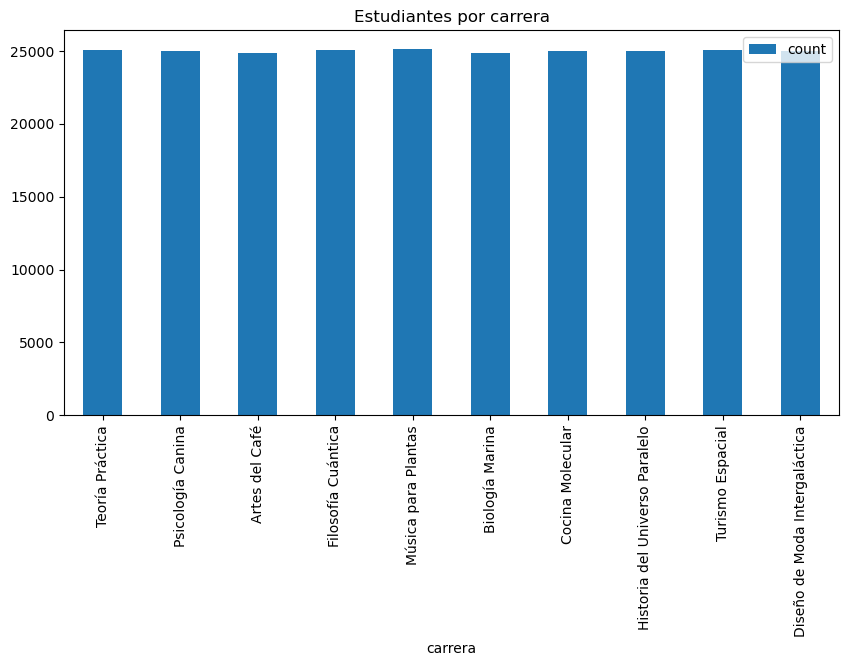

In [22]:
import matplotlib.pyplot as plt

df_pandas = df.groupBy("carrera").count().toPandas()

df_pandas.plot(kind="bar", x="carrera", y="count", figsize=(10, 5))
plt.title("Estudiantes por carrera")
plt.show()